# SVM

## import dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Task 1: Exploratory Data Analysis (EDA)

In [6]:
# Load the dataset
df = pd.read_csv("mushroom.csv")

In [8]:
# Display basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [10]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

C:\Users\dnyan\AppData\Local\Temp\ipykernel_5404\1325399446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=df, palette="coolwarm")


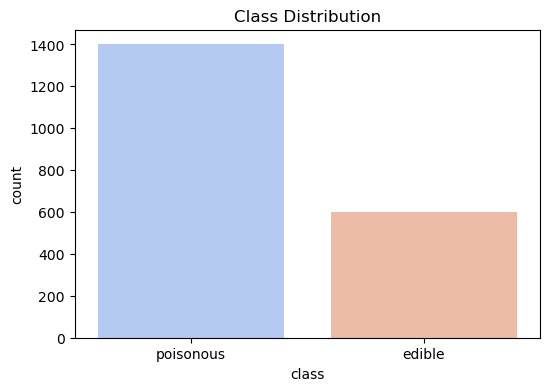

In [12]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="class", data=df, palette="coolwarm")
plt.title("Class Distribution")
plt.show()

# Task 2: Data Preprocessing

In [15]:
# Encode categorical variables
label_encoders = {}
categorical_columns = df.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [17]:
# Define features and target variable
X = df.drop(columns=["class"])
y = df["class"]

In [19]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Task 3: Data Visualization

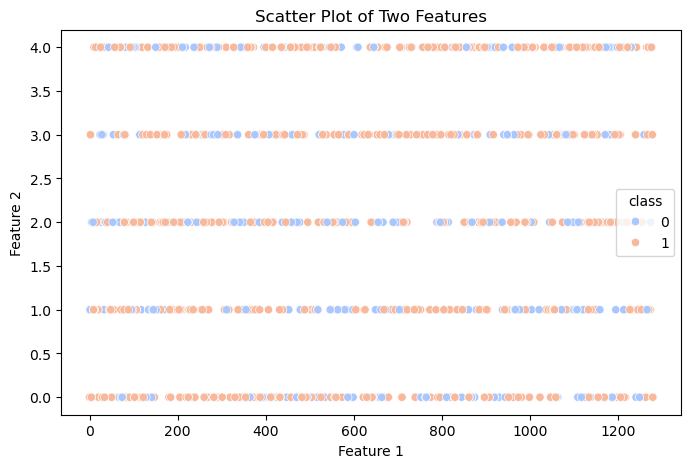

In [22]:
# Scatter plot (example using two numerical features)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=y_train, palette="coolwarm")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Two Features")
plt.show()

# Task 4: SVM Implementation

In [25]:
# Train an SVM model
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train[:5000], y_train[:5000])  # Using a subset of data to speed up training

SVC(kernel='linear', random_state=42)

In [27]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [29]:
# Evaluate the model
print("\nSVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


SVM Model Performance:
Accuracy: 0.7

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



C:\Users\dnyan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dnyan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dnyan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


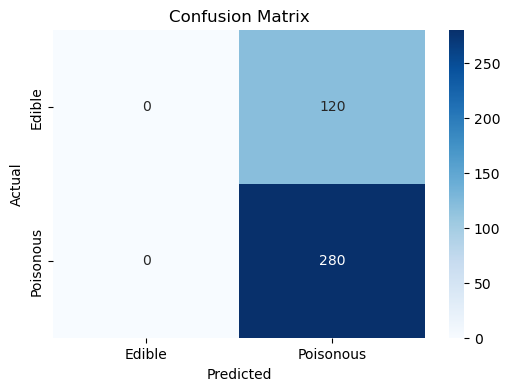

In [31]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Task 5: Visualization of SVM Results

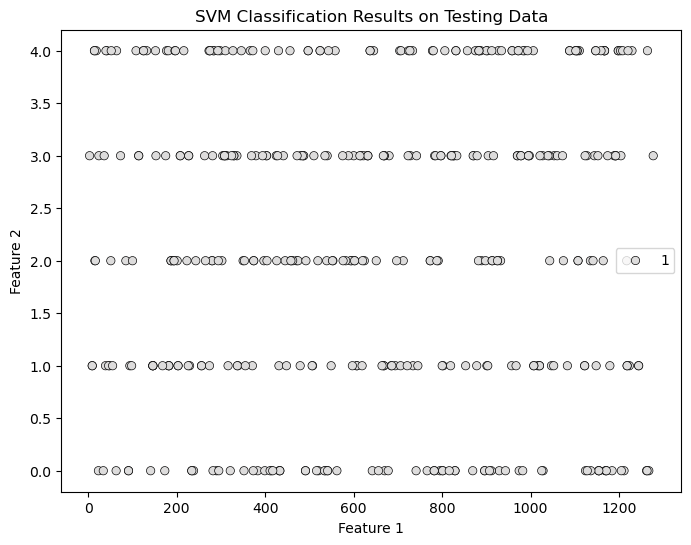

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred, palette="coolwarm", edgecolor="k")
plt.title("SVM Classification Results on Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Task 6: Parameter Tuning and Optimization

In [37]:
param_grid = {
    "C": [1, 10],  # Keeping only two values to reduce computation
    "kernel": ["rbf", "linear"]  # Removing polynomial kernel for faster execution
}
svm_grid = GridSearchCV(SVC(), param_grid, cv=2, scoring="accuracy", verbose=1, n_jobs=-1)  # Reducing cv to 2
svm_grid.fit(X_train[:1000], y_train[:1000])  # Using a smaller subset of data for GridSearchCV

print("\nBest Parameters:", svm_grid.best_params_)
print("Best Accuracy:", svm_grid.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Best Accuracy: 0.692


# Task 7: Comparison and Analysis

In [40]:
# Linear Kernel
linear_svc = SVC(kernel="linear", random_state=42)
linear_svc.fit(X_train, y_train)
y_pred_linear = linear_svc.predict(X_test)
print("\nLinear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))


Linear Kernel Accuracy: 0.7


In [42]:
# RBF Kernel
rbf_svc = SVC(kernel="rbf", random_state=42)
rbf_svc.fit(X_train, y_train)
y_pred_rbf = rbf_svc.predict(X_test)
print("\nRBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))


RBF Kernel Accuracy: 0.7


In [44]:
# Polynomial Kernel
poly_svc = SVC(kernel="poly", random_state=42)
poly_svc.fit(X_train, y_train)
y_pred_poly = poly_svc.predict(X_test)
print("\nPolynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))


Polynomial Kernel Accuracy: 0.7
